In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset in jupyter
df=pd.read_csv("H2HBABBA2495.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930824e+09,2020-04-25,20200424,20200425,20200510.0,USD,RV,1.0,NaN,3403.80,20200425.0,NAH4,1.930824e+09,1
1,U001,0200744019,TARG us,2019-12-24 00:00:00,2019.0,1.930211e+09,2019-12-03,20191203,20191203,20191218.0,USD,RV,1.0,NaN,7404.11,20191203.0,NAA8,1.930211e+09,0
2,U001,0200748108,KROGER in,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,20200430.0,USD,RV,1.0,NaN,43266.68,20200415.0,NAA8,1.930794e+09,1
3,U001,0200790107,ROU associates,2019-12-18 00:00:00,2019.0,1.929828e+09,2019-09-04,20190904,20190904,20190919.0,USD,RV,1.0,NaN,548.39,20190904.0,NAC6,1.929828e+09,0
4,U001,0200762301,C&S WH in,2019-03-12 00:00:00,2019.0,1.928847e+09,2019-02-25,20190224,20190225,20190312.0,USD,RV,1.0,NaN,20013.83,20190225.0,NAC6,1.928847e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200752393,S AB co,2020-01-22 00:00:00,2020.0,1.930390e+09,2020-01-12,20200113,20200112,20200127.0,USD,RV,1.0,NaN,70513.96,20200112.0,NAA8,1.930390e+09,0
49996,U001,0200799367,MCL,2019-07-05 00:00:00,2019.0,1.929490e+09,2019-06-19,20190614,20190619,20190704.0,USD,RV,1.0,NaN,27916.85,20190619.0,NAA8,1.929490e+09,0
49997,U001,0200769623,WAL-MAR,2019-12-31 00:00:00,2019.0,1.930301e+09,2019-12-20,20191219,20191220,20200104.0,USD,RV,1.0,NaN,15766.94,20191220.0,NAH4,1.930301e+09,0
49998,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930708e+09,2020-03-28,20200326,20200328,20200412.0,USD,RV,1.0,NaN,21837.85,20200328.0,NAH4,1.930708e+09,1


In [3]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64


# Splitting data on bases of clear_date 

In [4]:
#dataset with nonnull value
data = df[df['clear_date'].notna()]

In [5]:
#dataset with null value
TEST = df[df['clear_date'].isna()]

In [6]:
TEST

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930824e+09,2020-04-25,20200424,20200425,20200510.0,USD,RV,1.0,NaN,3403.80,20200425.0,NAH4,1.930824e+09,1
2,U001,0200748108,KROGER in,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,20200430.0,USD,RV,1.0,NaN,43266.68,20200415.0,NAA8,1.930794e+09,1
9,U001,0200797452,US systems,NaN,2020.0,1.930760e+09,2020-04-07,20200407,20200407,20200422.0,USD,RV,1.0,NaN,3761.63,20200407.0,NAA8,1.930760e+09,1
11,CA02,0140104429,COSTCO llc,NaN,2020.0,2.960628e+09,2020-04-13,20200413,20200413,20200423.0,CAD,RV,1.0,NaN,28813.49,20200413.0,CA10,2.960628e+09,1
15,U001,0200759878,SA in,NaN,2020.0,1.930704e+09,2020-03-26,20200325,20200326,20200410.0,USD,RV,1.0,NaN,19029.11,20200326.0,NAH4,1.930704e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,U001,0200726979,BJ'S,NaN,2020.0,1.930581e+09,2020-02-28,20200228,20200228,20200314.0,USD,RV,1.0,NaN,530.71,20200228.0,NAA8,1.930581e+09,1
49980,U001,CCCA02,KRAFT llc,NaN,2020.0,1.930581e+09,2020-02-28,20200227,20200228,20200403.0,USD,RV,1.0,NaN,19756.80,20200228.0,NAG2,1.930581e+09,1
49988,U001,200726979,BJ'S co,NaN,2020.0,1.930705e+09,2020-03-26,20200326,20200326,20200410.0,USD,RV,1.0,NaN,2740.65,20200326.0,NAA8,1.930705e+09,1
49992,U001,0200706844,WINC corp,NaN,2020.0,1.930571e+09,2020-02-28,20200226,20200228,20200314.0,USD,RV,1.0,NaN,58482.21,20200228.0,NAA8,1.930571e+09,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  posting_id              40000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       40000 non-null

# Data preprocessing
### Droping columns

In [8]:
#Droping Columns
data=data.drop(["isOpen","invoice_id","area_business"],axis=1)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms
1,U001,0200744019,TARG us,2019-12-24 00:00:00,2019.0,1.930211e+09,2019-12-03,20191203,20191203,20191218.0,USD,RV,1.0,7404.11,20191203.0,NAA8
3,U001,0200790107,ROU associates,2019-12-18 00:00:00,2019.0,1.929828e+09,2019-09-04,20190904,20190904,20190919.0,USD,RV,1.0,548.39,20190904.0,NAC6
4,U001,0200762301,C&S WH in,2019-03-12 00:00:00,2019.0,1.928847e+09,2019-02-25,20190224,20190225,20190312.0,USD,RV,1.0,20013.83,20190225.0,NAC6
5,U001,0200707005,KING S co,2019-01-22 00:00:00,2019.0,1.928559e+09,2019-01-04,20190103,20190104,20190119.0,USD,RV,1.0,46252.55,20190104.0,NAA8
6,U001,0100014724,DEC corp,2020-02-10 00:00:00,2020.0,1.930481e+09,2020-02-05,20200205,20200205,20200208.0,USD,RV,1.0,358431.15,20200201.0,NAM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200704858,WAKE us,2019-04-08 00:00:00,2019.0,1.929008e+09,2019-03-22,20190321,20190322,20190406.0,USD,RV,1.0,37569.97,20190322.0,NAA8
49995,U001,0200752393,S AB co,2020-01-22 00:00:00,2020.0,1.930390e+09,2020-01-12,20200113,20200112,20200127.0,USD,RV,1.0,70513.96,20200112.0,NAA8
49996,U001,0200799367,MCL,2019-07-05 00:00:00,2019.0,1.929490e+09,2019-06-19,20190614,20190619,20190704.0,USD,RV,1.0,27916.85,20190619.0,NAA8
49997,U001,0200769623,WAL-MAR,2019-12-31 00:00:00,2019.0,1.930301e+09,2019-12-20,20191219,20191220,20200104.0,USD,RV,1.0,15766.94,20191220.0,NAH4


In [9]:
data.nunique(),data.shape

(business_code                 6
 cust_number                1329
 name_customer              3860
 clear_date                  397
 buisness_year                 2
 doc_id                    39180
 posting_date                423
 document_create_date        427
 document_create_date.1      424
 due_in_date                 491
 invoice_currency              2
 document type                 2
 posting_id                    1
 total_open_amount         35836
 baseline_create_date        432
 cust_payment_terms           73
 dtype: int64,
 (40000, 16))

In [10]:
data[["baseline_create_date","document_create_date.1","document_create_date"]].corr()

,baseline_create_date,document_create_date.1,document_create_date
baseline_create_date,1.000000,0.99829,0.982983
document_create_date.1,0.998290,1.00000,0.984670
document_create_date,0.982983,0.98467,1.000000


In [11]:
data.drop(columns=["document_create_date.1","document_create_date",
#                    "doc_id"
                  ]
          ,inplace=True)


# Droping duplicate rows and Columns

In [12]:
def findduplicatecollum(df):
    dupcoloumname=set()
    for x in range(df.shape[1]):
        col1 =df.iloc[:x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:y]
            if col1.equals(col2):
                dupcoloumname.add(df.columns().values[y])
    return list(dupcoloumname)
                
duplicatecolumn=findduplicatecollum(data)
data.drop(columns=duplicatecolumn,inplace=True)
unique_cols =  [x for x in data.columns if data[x].nunique()==1] 
print(unique_cols)
data.drop(unique_cols,axis=1,inplace=True)
data.columns

['posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'document type', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms'],
      dtype='object')

In [13]:
data.drop_duplicates(subset=None, keep='first',inplace=True)

# converting Clear date, due in due in to date time format for delay calculation

In [14]:
data["clear_date"]=pd.to_datetime(data["clear_date"],format="%Y %m %d")

In [15]:
data["due_in_date"]=pd.to_datetime(data["due_in_date"],format="%Y%m%d")

In [16]:
data["Delay"]=(data["clear_date"]-data["due_in_date"])

In [17]:
data["Delay"]=data["Delay"].dt.days

In [18]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Delay
1,U001,0200744019,TARG us,2019-12-24,2019.0,1.930211e+09,2019-12-03,2019-12-18,USD,RV,7404.11,20191203.0,NAA8,6
3,U001,0200790107,ROU associates,2019-12-18,2019.0,1.929828e+09,2019-09-04,2019-09-19,USD,RV,548.39,20190904.0,NAC6,90
4,U001,0200762301,C&S WH in,2019-03-12,2019.0,1.928847e+09,2019-02-25,2019-03-12,USD,RV,20013.83,20190225.0,NAC6,0
5,U001,0200707005,KING S co,2019-01-22,2019.0,1.928559e+09,2019-01-04,2019-01-19,USD,RV,46252.55,20190104.0,NAA8,3
6,U001,0100014724,DEC corp,2020-02-10,2020.0,1.930481e+09,2020-02-05,2020-02-08,USD,RV,358431.15,20200201.0,NAM1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200704858,WAKE us,2019-04-08,2019.0,1.929008e+09,2019-03-22,2019-04-06,USD,RV,37569.97,20190322.0,NAA8,2
49995,U001,0200752393,S AB co,2020-01-22,2020.0,1.930390e+09,2020-01-12,2020-01-27,USD,RV,70513.96,20200112.0,NAA8,-5
49996,U001,0200799367,MCL,2019-07-05,2019.0,1.929490e+09,2019-06-19,2019-07-04,USD,RV,27916.85,20190619.0,NAA8,1
49997,U001,0200769623,WAL-MAR,2019-12-31,2019.0,1.930301e+09,2019-12-20,2020-01-04,USD,RV,15766.94,20191220.0,NAH4,-4


# Sorting data frame according to POSTING date

In [19]:
data.sort_values(by=['posting_date'],inplace=True)

In [20]:
data['posting_date']=pd.to_datetime(data['posting_date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39180 entries, 11361 to 32461
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39180 non-null  object        
 1   cust_number           39180 non-null  object        
 2   name_customer         39180 non-null  object        
 3   clear_date            39180 non-null  datetime64[ns]
 4   buisness_year         39180 non-null  float64       
 5   doc_id                39180 non-null  float64       
 6   posting_date          39180 non-null  datetime64[ns]
 7   due_in_date           39180 non-null  datetime64[ns]
 8   invoice_currency      39180 non-null  object        
 9   document type         39180 non-null  object        
 10  total_open_amount     39180 non-null  float64       
 11  baseline_create_date  39180 non-null  float64       
 12  cust_payment_terms    39180 non-null  object        
 13  Delay       

In [22]:
data.drop(columns=["business_code"],inplace=True)

In [23]:
data['posting_date'].min(),data['posting_date'].max()

(Timestamp('2018-12-30 00:00:00'), Timestamp('2020-02-27 00:00:00'))

In [24]:
data["baseline_create_date"]=pd.to_datetime(data["baseline_create_date"],format="%Y%m%d")


In [25]:
x=data.drop("Delay",axis=1)

y=data["Delay"]

# Spliting Data into Train test val split

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)

In [27]:
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=0 , shuffle = False)

In [28]:
x_train.shape,x_test.shape,x_val.shape

((27426, 12), (5877, 12), (5877, 12))

# EDA

<AxesSubplot:xlabel='Delay', ylabel='Density'>

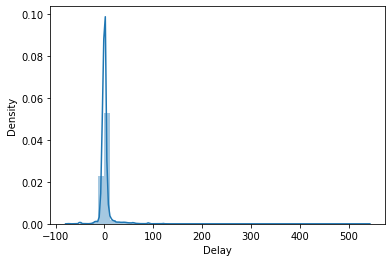

In [29]:
sns.distplot(y_train)

<AxesSubplot:xlabel='Delay', ylabel='posting_date'>

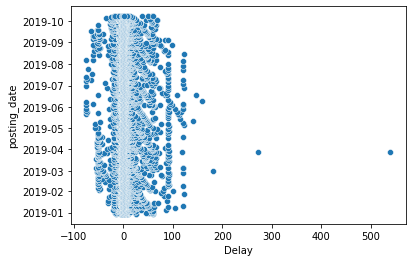

In [30]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="Delay", y="posting_date")

# Feature Engg

In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27426 entries, 11361 to 2694
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27426 non-null  object        
 1   name_customer         27426 non-null  object        
 2   clear_date            27426 non-null  datetime64[ns]
 3   buisness_year         27426 non-null  float64       
 4   doc_id                27426 non-null  float64       
 5   posting_date          27426 non-null  datetime64[ns]
 6   due_in_date           27426 non-null  datetime64[ns]
 7   invoice_currency      27426 non-null  object        
 8   document type         27426 non-null  object        
 9   total_open_amount     27426 non-null  float64       
 10  baseline_create_date  27426 non-null  datetime64[ns]
 11  cust_payment_terms    27426 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 2.7+ MB


# Encoding Column using lable encoding
in x_train , x_val , x_test

In [32]:
from sklearn.preprocessing import LabelEncoder
cust_number_enco=LabelEncoder()
cust_number_enco.fit(x_train["cust_number"])
x_train["cust_number_enco"]=cust_number_enco.transform(x_train["cust_number"])
temp = set(x_val['cust_number'])-set(cust_number_enco.classes_)
for items in temp:
    cust_number_enco.classes_= np.append(cust_number_enco.classes_,items)
x_val["cust_number_enco"]=cust_number_enco.transform(x_val["cust_number"])
temp = set(x_test['cust_number'])-set(cust_number_enco.classes_)
for items in temp:
    cust_number_enco.classes_= np.append(cust_number_enco.classes_,items)
x_test["cust_number_enco"]=cust_number_enco.transform(x_test["cust_number"])

In [33]:
document_type_enco=LabelEncoder()
document_type_enco.fit(x_train["document type"])
x_train["document_type_enco"]=document_type_enco.transform(x_train["document type"])
x_val["document_type_enco"]=document_type_enco.transform(x_val["document type"])
x_test["document_type_enco"]=document_type_enco.transform(x_test["document type"])

In [34]:
cust_payment_terms_enco=LabelEncoder()
cust_payment_terms_enco.fit(x_train["cust_payment_terms"])
x_train["cust_payment_terms_enco"]=cust_payment_terms_enco.transform(x_train["cust_payment_terms"])
temp = set(x_val['cust_payment_terms'])-set(cust_payment_terms_enco.classes_)
for items in temp:
    cust_payment_terms_enco.classes_= np.append(cust_payment_terms_enco.classes_,items)
x_val["cust_payment_terms_enco"]=cust_payment_terms_enco.transform(x_val["cust_payment_terms"])
temp = set(x_test['cust_payment_terms'])-set(cust_payment_terms_enco.classes_)
for items in temp:
    cust_payment_terms_enco.classes_= np.append(cust_payment_terms_enco.classes_,items)
x_test["cust_payment_terms_enco"]=cust_payment_terms_enco.transform(x_test["cust_payment_terms"])


In [35]:
invoice_currency_enco=LabelEncoder()
invoice_currency_enco.fit(x_train["invoice_currency"])
x_train["invoice_currency_enco"]=invoice_currency_enco.transform(x_train["invoice_currency"])
x_val["invoice_currency_enco"]=invoice_currency_enco.transform(x_val["invoice_currency"])
x_test["invoice_currency_enco"]=invoice_currency_enco.transform(x_test["invoice_currency"])



In [36]:
name_customer_enco=LabelEncoder()
name_customer_enco.fit(x_train["name_customer"])
x_train["name_customer_enco"]=name_customer_enco.transform(x_train["name_customer"])
temp = set(x_val['name_customer'])-set(name_customer_enco.classes_)
for items in temp:
    name_customer_enco.classes_= np.append(name_customer_enco.classes_,items)
x_val["name_customer_enco"]=name_customer_enco.transform(x_val["name_customer"])
temp = set(x_test['name_customer'])-set(name_customer_enco.classes_)
for items in temp:
    name_customer_enco.classes_= np.append(name_customer_enco.classes_,items)
x_test["name_customer_enco"]=name_customer_enco.transform(x_test["name_customer"])

In [37]:
drop_list=["name_customer","invoice_currency","cust_payment_terms","document type","cust_number"]
x_train.drop(drop_list,axis=1,inplace=True)
x_test.drop(drop_list,axis=1,inplace=True)
x_val.drop(drop_list,axis=1,inplace=True)

# Extracting day month year feature 

In [38]:
x_train["posting_day"] =x_train["posting_date"].dt.day
x_train["posting_month"]=x_train["posting_date"].dt.month
x_train["posting_year"]=x_train["posting_date"].dt.year

x_test["posting_day"] =x_test["posting_date"].dt.day
x_test["posting_month"]=x_test["posting_date"].dt.month
x_test["posting_year"]=x_test["posting_date"].dt.year


x_val["posting_day"] =x_val["posting_date"].dt.day
x_val["posting_month"]=x_val["posting_date"].dt.month
x_val["posting_year"]=x_val["posting_date"].dt.year

In [39]:
x_train["baseline_create_day"] =x_train["baseline_create_date"].dt.day
x_train["baseline_create_month"]=x_train["baseline_create_date"].dt.month
x_train["baseline_create_year"]=x_train["baseline_create_date"].dt.year

x_test["baseline_create_day"] =x_test["baseline_create_date"].dt.day
x_test["baseline_create_month"]=x_test["baseline_create_date"].dt.month
x_test["baseline_create_year"]=x_test["baseline_create_date"].dt.year

x_val["baseline_create_day"] =x_val["baseline_create_date"].dt.day
x_val["baseline_create_month"]=x_val["baseline_create_date"].dt.month
x_val["baseline_create_year"]=x_val["baseline_create_date"].dt.year

In [40]:
x_train.nunique(),x_train.shape

(clear_date                   288
 buisness_year                  1
 doc_id                     27426
 posting_date                 283
 due_in_date                  345
 total_open_amount          25283
 baseline_create_date         294
 cust_number_enco            1219
 document_type_enco             2
 cust_payment_terms_enco       64
 invoice_currency_enco          2
 name_customer_enco          3331
 posting_day                   31
 posting_month                 11
 posting_year                   2
 baseline_create_day           31
 baseline_create_month         11
 baseline_create_year           2
 dtype: int64,
 (27426, 18))

In [41]:
# sns.pairplot(x_train)

# Feature selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

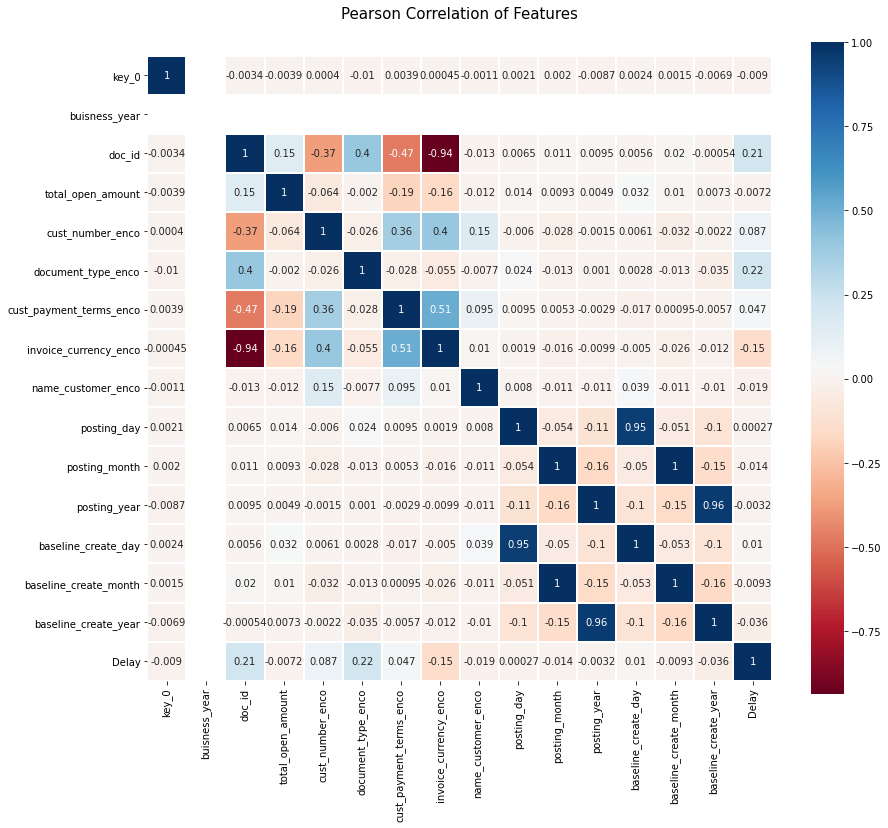

In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [43]:
feature=[
#     'buisness_year',
    "doc_id",
         'total_open_amount', 
#          'baseline_create_date', 
         'cust_number_enco',
       'document_type_enco', 
         'cust_payment_terms_enco',
       'invoice_currency_enco', 
    'name_customer_enco',
         "posting_day","posting_year","posting_month",
    "baseline_create_day","baseline_create_year","baseline_create_month"
        ]


In [44]:
MSE = []
RMSE = []
Algorithm = []

# Modelling

# Creating model

## Linear regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math as m
Algorithm.append("LinearRegression")
base_model = LinearRegression()
base_model.fit(x_train[feature], y_train)

LinearRegression()

In [46]:
y_predict = base_model.predict(x_val[feature])


In [47]:
mse=mean_squared_error(y_val, y_predict, squared=False)
MSE.append(mse)
mse

6.81379646324883

In [48]:
rmse=m.sqrt(mse)
rmse

2.6103249727282676

In [49]:
RMSE.append(rmse)

# DecisionTreeRegressor

In [50]:
Algorithm.append("DecisionTreeRegressor")

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=6)

In [51]:
regressor.fit(x_train[feature], y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [52]:
y_predict_val = regressor.predict(x_val[feature])


In [53]:
mse=mean_squared_error(y_val, y_predict_val, squared=False)
MSE.append(mse)
mse

5.6738677421711

In [54]:
rmse=m.sqrt(mse)
rmse

2.381988191022596

In [55]:
RMSE.append(rmse)

# RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train[feature], y_train)

RandomForestRegressor()

In [57]:
y_predict_val = regressor.predict(x_val[feature])
mse=mean_squared_error(y_val, y_predict_val, squared=False)
MSE.append(mse)
mse

5.6738677421711

In [58]:
rmse=m.sqrt(mse)
rmse

2.381988191022596

In [59]:
RMSE.append(rmse)

# SVR

In [60]:
from sklearn.svm import SVR

Algorithm.append('Support Vector Regression')
svr = SVR()
svr.fit(x_train[feature], y_train)

# Predicting the Test Set Results
y_predict_val = clf.predict(x_val[feature])

In [61]:
mse=mean_squared_error(y_val, y_predict_val, squared=False)
MSE.append(mse)
mse

8.58237358357573

In [62]:
m.sqrt(mse)

2.929568839193872

In [63]:
rmse=m.sqrt(mse)
rmse

2.929568839193872

In [64]:
RMSE.append(rmse)

# xgboost

In [65]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
XGB = xgb.XGBRegressor()
XGB.fit(x_train[feature], y_train)

# Predicting the Test Set Results
y_predict_val = clf.predict(x_test[feature])

In [66]:
mse=mean_squared_error(y_val, y_predict_val, squared=False)
MSE.append(mse)
mse

12.075413216074573

In [67]:
m.sqrt(mse)

3.4749695273591352

In [68]:
rmse=m.sqrt(mse)
rmse

3.4749695273591352

In [69]:
RMSE.append(rmse)

In [70]:
Comparison = pd.DataFrame(list(zip(Algorithm , RMSE,MSE)), columns = ['Algorithm', 'RMSE',"MSE"])

### RMSE Comparison matrix

In [71]:
Comparison

,Algorithm,RMSE,MSE
0,LinearRegression,2.610325,6.813796
1,DecisionTreeRegressor,2.381988,5.673868
2,Random Forest Regressor,2.381988,5.673868
3,Support Vector Regression,2.929569,8.582374
4,XGB Regressor,3.474970,12.075413


# Pridicting delay for x_test using DecisionTreeRegressor

In [72]:
y_predict_test = regressor.predict(x_test[feature])
mse=mean_squared_error(y_test, y_predict_test, squared=False)
mse

7.909845458367169

# Preprocessing on test dataset

In [73]:
TEST.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### making feature in x_main_test same as in x_train

In [74]:
main_test=TEST.drop(["isOpen","document_create_date","document_create_date.1",
#                        "doc_id",
                       "area_business","invoice_id","business_code","posting_id"],axis=1)

In [75]:
main_test["invoice_currency_enco"]=invoice_currency_enco.transform(main_test["invoice_currency"])


In [76]:
main_test["document_type_enco"]=document_type_enco.transform(main_test["document type"])


In [77]:
temp = set(main_test['cust_number'])-set(cust_number_enco.classes_)
for items in temp:
    cust_number_enco.classes_= np.append(cust_number_enco.classes_,items)

main_test['cust_number_enco'] = cust_number_enco.transform(main_test['cust_number'])

In [78]:
temp = set(main_test['cust_payment_terms'])-set(cust_payment_terms_enco.classes_)
for items in temp:
    cust_payment_terms_enco.classes_= np.append(cust_payment_terms_enco.classes_,items)

main_test['cust_payment_terms_enco'] = cust_payment_terms_enco.transform(main_test['cust_payment_terms'])

In [79]:

temp = set(main_test['name_customer'])-set(name_customer_enco.classes_)
for items in temp:
    name_customer_enco.classes_= np.append(name_customer_enco.classes_,items)

main_test['name_customer_enco'] = name_customer_enco.transform(main_test['name_customer'])

In [80]:
drop_list=["name_customer","invoice_currency","cust_payment_terms","document type","cust_number"]
main_test.drop(columns=drop_list,axis=1,inplace=True)

In [81]:
main_test['posting_date']=pd.to_datetime(main_test['posting_date'])
main_test["posting_day"] =main_test["posting_date"].dt.day
main_test["posting_month"]=main_test["posting_date"].dt.month
main_test["posting_year"]=main_test["posting_date"].dt.year

In [82]:
main_test['baseline_create_date']=pd.to_datetime(main_test['baseline_create_date'])

main_test["baseline_create_day"] =main_test["baseline_create_date"].dt.day
main_test["baseline_create_month"]=main_test["baseline_create_date"].dt.month
main_test["baseline_create_year"]=main_test["baseline_create_date"].dt.year

# Predicting delay on x_main_test

In [83]:
final_result = regressor.predict(main_test[feature])


In [84]:
final_result = pd.Series(final_result,name='Delay')


In [85]:
TEST.reset_index(drop=True,inplace=True)

In [86]:
Final = TEST.merge(final_result , on = main_test[feature].index )
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930824e+09,2020-04-25,20200424,20200425,...,USD,RV,1.0,NaN,3403.80,20200425.0,NAH4,1.930824e+09,1,-1.987048
1,2,U001,0200748108,KROGER in,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,...,USD,RV,1.0,NaN,43266.68,20200415.0,NAA8,1.930794e+09,1,1.507916
2,9,U001,0200797452,US systems,NaN,2020.0,1.930760e+09,2020-04-07,20200407,20200407,...,USD,RV,1.0,NaN,3761.63,20200407.0,NAA8,1.930760e+09,1,1.507916
3,11,CA02,0140104429,COSTCO llc,NaN,2020.0,2.960628e+09,2020-04-13,20200413,20200413,...,CAD,RV,1.0,NaN,28813.49,20200413.0,CA10,2.960628e+09,1,5.399752
4,15,U001,0200759878,SA in,NaN,2020.0,1.930704e+09,2020-03-26,20200325,20200326,...,USD,RV,1.0,NaN,19029.11,20200326.0,NAH4,1.930704e+09,1,-1.987048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49976,U001,0200726979,BJ'S,NaN,2020.0,1.930581e+09,2020-02-28,20200228,20200228,...,USD,RV,1.0,NaN,530.71,20200228.0,NAA8,1.930581e+09,1,0.287457
9996,49980,U001,CCCA02,KRAFT llc,NaN,2020.0,1.930581e+09,2020-02-28,20200227,20200228,...,USD,RV,1.0,NaN,19756.80,20200228.0,NAG2,1.930581e+09,1,8.579564
9997,49988,U001,200726979,BJ'S co,NaN,2020.0,1.930705e+09,2020-03-26,20200326,20200326,...,USD,RV,1.0,NaN,2740.65,20200326.0,NAA8,1.930705e+09,1,0.287457
9998,49992,U001,0200706844,WINC corp,NaN,2020.0,1.930571e+09,2020-02-28,20200226,20200228,...,USD,RV,1.0,NaN,58482.21,20200228.0,NAA8,1.930571e+09,1,1.507916


## Calculating predicted due date

In [87]:

Final["due_in_date"]=pd.to_datetime(Final["due_in_date"],format="%Y%m%d")
Final["Pridicted_date"]=Final["due_in_date"] + pd.to_timedelta(Final["Delay"], unit='d')

In [88]:
Final["Pridicted_date"]=Final["Pridicted_date"].astype("str").str[:11]
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Pridicted_date
0,0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930824e+09,2020-04-25,20200424,20200425,...,RV,1.0,NaN,3403.80,20200425.0,NAH4,1.930824e+09,1,-1.987048,2020-05-08
1,2,U001,0200748108,KROGER in,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,...,RV,1.0,NaN,43266.68,20200415.0,NAA8,1.930794e+09,1,1.507916,2020-05-01
2,9,U001,0200797452,US systems,NaN,2020.0,1.930760e+09,2020-04-07,20200407,20200407,...,RV,1.0,NaN,3761.63,20200407.0,NAA8,1.930760e+09,1,1.507916,2020-04-23
3,11,CA02,0140104429,COSTCO llc,NaN,2020.0,2.960628e+09,2020-04-13,20200413,20200413,...,RV,1.0,NaN,28813.49,20200413.0,CA10,2.960628e+09,1,5.399752,2020-04-28
4,15,U001,0200759878,SA in,NaN,2020.0,1.930704e+09,2020-03-26,20200325,20200326,...,RV,1.0,NaN,19029.11,20200326.0,NAH4,1.930704e+09,1,-1.987048,2020-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49976,U001,0200726979,BJ'S,NaN,2020.0,1.930581e+09,2020-02-28,20200228,20200228,...,RV,1.0,NaN,530.71,20200228.0,NAA8,1.930581e+09,1,0.287457,2020-03-14
9996,49980,U001,CCCA02,KRAFT llc,NaN,2020.0,1.930581e+09,2020-02-28,20200227,20200228,...,RV,1.0,NaN,19756.80,20200228.0,NAG2,1.930581e+09,1,8.579564,2020-04-11
9997,49988,U001,200726979,BJ'S co,NaN,2020.0,1.930705e+09,2020-03-26,20200326,20200326,...,RV,1.0,NaN,2740.65,20200326.0,NAA8,1.930705e+09,1,0.287457,2020-04-10
9998,49992,U001,0200706844,WINC corp,NaN,2020.0,1.930571e+09,2020-02-28,20200226,20200228,...,RV,1.0,NaN,58482.21,20200228.0,NAA8,1.930571e+09,1,1.507916,2020-03-15


# Creating buckets

In [89]:
#Function to calcuclate delay range
def bucket(x):
    if x<0:
        return ("<0 days")
    elif x>=0 and x<15:
        return ("0-15 days")
    elif x>=15 and x<31:
        return ("15-31 days")
    elif x>=31 and x<45:
        return ("31-45 days")
    elif x>=45 and x<60:
        return ("45-60 days")
    else:
        return(">60 days")

In [90]:
# adding bucket array to data frame
ll=[]
for x in range(len(Final["Delay"])):
    ll.append(bucket(Final["Delay"][x]))
Final["bucket"]=ll

# End result

In [91]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Pridicted_date,bucket
0,0,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930824e+09,2020-04-25,20200424,20200425,...,1.0,NaN,3403.80,20200425.0,NAH4,1.930824e+09,1,-1.987048,2020-05-08,<0 days
1,2,U001,0200748108,KROGER in,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,...,1.0,NaN,43266.68,20200415.0,NAA8,1.930794e+09,1,1.507916,2020-05-01,0-15 days
2,9,U001,0200797452,US systems,NaN,2020.0,1.930760e+09,2020-04-07,20200407,20200407,...,1.0,NaN,3761.63,20200407.0,NAA8,1.930760e+09,1,1.507916,2020-04-23,0-15 days
3,11,CA02,0140104429,COSTCO llc,NaN,2020.0,2.960628e+09,2020-04-13,20200413,20200413,...,1.0,NaN,28813.49,20200413.0,CA10,2.960628e+09,1,5.399752,2020-04-28,0-15 days
4,15,U001,0200759878,SA in,NaN,2020.0,1.930704e+09,2020-03-26,20200325,20200326,...,1.0,NaN,19029.11,20200326.0,NAH4,1.930704e+09,1,-1.987048,2020-04-08,<0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49976,U001,0200726979,BJ'S,NaN,2020.0,1.930581e+09,2020-02-28,20200228,20200228,...,1.0,NaN,530.71,20200228.0,NAA8,1.930581e+09,1,0.287457,2020-03-14,0-15 days
9996,49980,U001,CCCA02,KRAFT llc,NaN,2020.0,1.930581e+09,2020-02-28,20200227,20200228,...,1.0,NaN,19756.80,20200228.0,NAG2,1.930581e+09,1,8.579564,2020-04-11,0-15 days
9997,49988,U001,200726979,BJ'S co,NaN,2020.0,1.930705e+09,2020-03-26,20200326,20200326,...,1.0,NaN,2740.65,20200326.0,NAA8,1.930705e+09,1,0.287457,2020-04-10,0-15 days
9998,49992,U001,0200706844,WINC corp,NaN,2020.0,1.930571e+09,2020-02-28,20200226,20200228,...,1.0,NaN,58482.21,20200228.0,NAA8,1.930571e+09,1,1.507916,2020-03-15,0-15 days
